# OpenAI Image Generation Agent (DALL-E-3)

In [ ]:
import os

from PIL import Image
from IPython.display import display

In [ ]:
## Setting up the Agent

Thought: I need to use a tool to generate a hacker image with the specified size.
Action: image_generation
Action Input: {'text': 'hacker', 'size': '1024x1024'}
Observation: ../../../img_cache/1699726591.795358.jpg
Thought: I have generated the hacker image successfully.
Action: show_image
Action Input: {'filename': '../../../img_cache/1699726591.795358.jpg'}


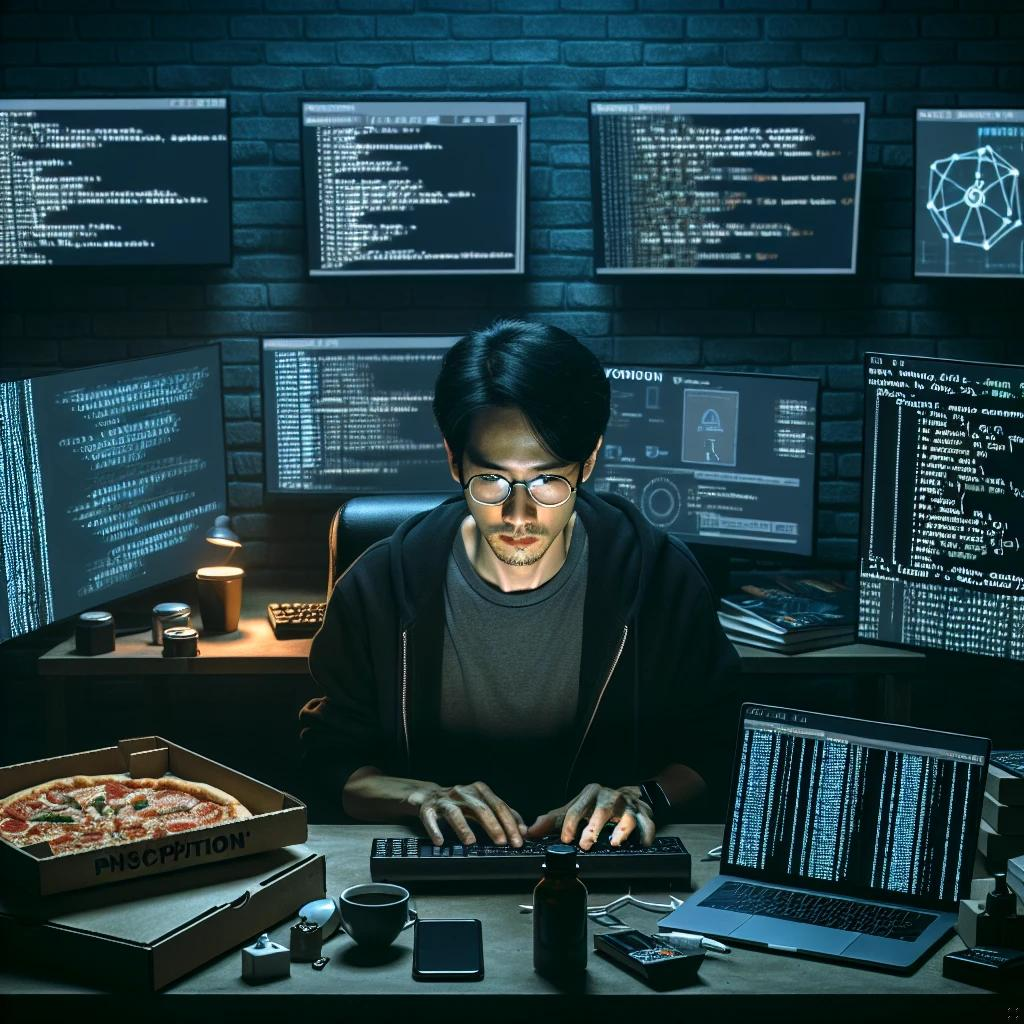

Observation: None
Thought: The image has been displayed successfully.
Response: Here is the hacker image you requested:
![hacker image](../../../img_cache/1699726591.795358.jpg)


In [ ]:
from llama_index.tools.openai.image_generation import OpenAIImageGenerationToolSpec
from llama_index.agent import ReActAgent
from llama_index.tools import FunctionTool


def show_image(filename: str) -> Image:
    """Display an image based on the filename"""
    img = Image.open(filename)
    return display(img)


image_generation_tool = OpenAIImageGenerationToolSpec(
    api_key=os.environ["OPENAI_API_KEY"]
)
show_image_tool = FunctionTool.from_defaults(fn=show_image)

agent = ReActAgent.from_tools(
    [*image_generation_spec.to_tool_list(), show_image_tool], verbose=True
)

response = agent.query(
    "generate a hacker image with size 1024x1024, use the filename and show the image"
)